## Step-1: Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Step-2: Reading and understanding the data

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Step-3: Data Preparation

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_train,df_test = train_test_split(df,train_size=0.3,random_state=42)

In [ ]:
df_train.shape,df_test.shape

((230, 9), (538, 9))

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler_col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
df_train[scaler_col] = scaler.fit_transform(df_train[scaler_col])
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,0.117647,0.989950,0.573770,0.882353,0.641844,0.576560,0.033137,0.533333,1
625,0.235294,0.452261,0.721311,0.921569,0.063830,0.712665,0.125738,0.133333,0
36,0.647059,0.693467,0.622951,0.000000,0.000000,0.627599,0.152065,0.233333,0
452,0.000000,0.457286,0.557377,0.627451,0.248227,0.754253,0.134362,0.066667,0
253,0.000000,0.432161,0.557377,0.627451,0.000000,0.676749,0.069451,0.066667,0


In [ ]:
df_test[scaler_col] = scaler.transform(df_test[scaler_col])
df_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,0.352941,0.492462,0.475410,0.647059,0.224586,0.642722,0.156605,0.366667,0
324,0.117647,0.562814,0.614754,0.627451,0.000000,0.674858,0.028597,0.000000,0
624,0.117647,0.542714,0.524590,0.000000,0.000000,0.582231,0.033137,0.000000,0
690,0.470588,0.537688,0.655738,0.000000,0.000000,0.465028,0.349977,0.216667,0
473,0.411765,0.683417,0.737705,0.000000,0.000000,0.565217,0.056741,0.483333,0


In [ ]:
X_train = df_train.drop('Outcome',axis=1)
y_train = df_train['Outcome']

In [ ]:
X_test = df_test.drop('Outcome',axis=1)
y_test = df_test['Outcome']

## Step-4: Model Building and predictions

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [ ]:
accuracy_score(y_train,y_train_pred)

0.8217391304347826

In [ ]:
accuracy_score(y_test,y_test_pred)

0.7118959107806692

In [ ]:
for k in range(1,13):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_test_pred = knn.predict(X_test)
    print(k,accuracy_score(y_test,y_test_pred))

1 0.7026022304832714
2 0.6840148698884758
3 0.7026022304832714
4 0.6970260223048327
5 0.7118959107806692
6 0.7007434944237918
7 0.7118959107806692
8 0.7007434944237918
9 0.6951672862453532
10 0.6988847583643123
11 0.6914498141263941
12 0.6970260223048327


In [ ]:
train_accuracy =np.empty(9)
test_accuracy = np.empty(9)

for k in range(1,9):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_train_pred = knn.predict(X_train)
    train_accuracy[k] = accuracy_score(y_train,y_train_pred)
    y_test_pred = knn.predict(X_test)
    test_accuracy[k] = accuracy_score(y_test,y_test_pred)

df1 = pd.DataFrame(train_accuracy,columns=['TrainAcc'])
df2 = pd.DataFrame(test_accuracy,columns=['TestAcc'])
df3 = pd.concat([df1,df2],axis=1)
df3

,TrainAcc,TestAcc
0,0.000000,0.000000
1,1.000000,0.702602
2,0.821739,0.684015
3,0.847826,0.702602
4,0.821739,0.697026
5,0.821739,0.711896
6,0.804348,0.700743
7,0.808696,0.711896
8,0.786957,0.700743


In [ ]:
plt.style.use('ggplot')

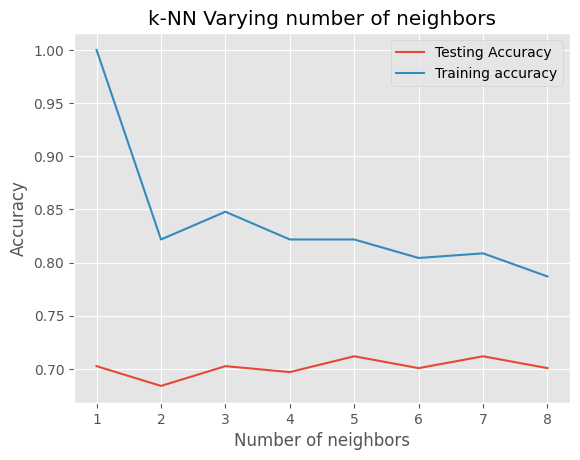

In [ ]:
#Generate plot
neighbors = np.arange(1,9)
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy[1:], label='Testing Accuracy')
plt.plot(neighbors, train_accuracy[1:], label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### Using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.best_score_

0.7478260869565218

In [ ]:
knn_cv.best_params_

{'n_neighbors': 6}